In [1]:
from keras import models
from keras import layers

Using TensorFlow backend.


In [0]:
import pandas as pd 
  
df=pd.read_csv("domain_leaderData.csv") 
df.reset_index(drop=True, inplace=True)

In [3]:
all_columns = (list(df.columns))

output_columns = all_columns[-6:]

input_features = all_columns[:-6]
print(input_features)

X = {}
y = {}

for column in output_columns:
  y[column] = df[column].values
  X[column] = df[input_features].values
print(y)



['Derailers', 'Engagement Style', 'Global Factor', 'Interaction', 'Leadership Derailer', 'Learning Style', 'Perception Traits', 'Relationship Management', 'Self Awareness', 'Self Disclosure', 'Self management', 'Social Awareness', 'Transformational Leadership Traits']
{'Good': array([2., 3., 2., 3., 3., 4., 3., 3., 4., 5., 5., 4., 5., 3., 5., 4., 4.,
       3., 5., 3., 5., 3., 4., 5., 4., 5., 5., 3., 5., 3., 2., 4., 3., 5.,
       5., 5., 5., 4., 3., 2., 3., 5., 5., 4., 5., 4., 4., 4., 4.]), 'Change': array([2., 2., 3., 3., 3., 4., 3., 3., 5., 4., 4., 4., 4., 3., 5., 4., 5.,
       3., 4., 3., 5., 3., 4., 5., 4., 5., 4., 3., 4., 3., 2., 4., 4., 4.,
       4., 4., 4., 4., 4., 1., 3., 4., 5., 4., 4., 5., 4., 5., 4.]), 'Engagement': array([2., 4., 2., 5., 3., 5., 4., 2., 5., 5., 4., 4., 5., 3., 5., 5., 3.,
       3., 3., 3., 5., 3., 3., 5., 4., 5., 4., 4., 4., 3., 2., 4., 4., 5.,
       5., 5., 4., 4., 3., 1., 3., 5., 5., 4., 4., 5., 5., 5., 5.]), 'Stability': array([4., 3., 4., 4., 5., 3

In [6]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X_train={}
X_test={}
y_train={}
y_test={}


for column in output_columns:
  X_train[column], X_test[column], y_train[column], y_test[column] = train_test_split(X[column], y[column], test_size=0.1,random_state=42)


print(y_test)

for column in output_columns:
  y_train[column]-=1
  y_test[column]-=1
  y_train[column] = to_categorical(y_train[column])
  y_test[column] = to_categorical(y_test[column])

for column in output_columns:
  print(y_test[column])

{'Good': array([3., 4., 4., 5., 3.]), 'Change': array([3., 5., 5., 4., 3.]), 'Engagement': array([3., 5., 5., 4., 3.]), 'Stability': array([2., 4., 5., 5., 4.]), 'Visionary': array([3., 5., 4., 4., 3.]), 'Disruptor': array([2., 5., 4., 4., 3.])}
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]


In [21]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

y_3={}
X_train_3={}
X_test_3={}
y_train_3={}
y_test_3={}

for column in output_columns:
  y_3[column] = y[column].copy()
## Converting the values into 3 classes
  for i in range(0,y_3[column].shape[0]):
    if(y_3[column][i]<3):
      y_3[column][i]=0
    elif(y_3[column][i]==3):
      y_3[column][i]=1
    else:
      y_3[column][i]=2



for column in output_columns:
  X_train_3[column], X_test_3[column], y_train_3[column], y_test_3[column] = train_test_split(X[column], y_3[column], test_size=0.1,random_state=42)
  y_train_3[column] = to_categorical(y_train_3[column])
  y_test_3[column] = to_categorical(y_test_3[column])
  print(y_test_3[column])
  input()


# print(y_test_3)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]

[[1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]



Epoch 1/600
44/44 [==============================] - 0s 2ms/step - loss: 1.1253 - accuracy: 0.2727
Epoch 2/600
44/44 [==============================] - 0s 161us/step - loss: 1.0960 - accuracy: 0.2727
Epoch 3/600
44/44 [==============================] - 0s 167us/step - loss: 1.0879 - accuracy: 0.2727
Epoch 4/600
44/44 [==============================] - 0s 182us/step - loss: 1.0846 - accuracy: 0.2727
Epoch 5/600
44/44 [==============================] - 0s 168us/step - loss: 1.0807 - accuracy: 0.2727
Epoch 6/600
44/44 [==============================] - 0s 176us/step - loss: 1.0770 - accuracy: 0.2727
Epoch 7/600
44/44 [==============================] - 0s 169us/step - loss: 1.0734 - accuracy: 0.2727
Epoch 8/600
44/44 [==============================] - 0s 183us/step - loss: 1.0673 - accuracy: 0.2727
Epoch 9/600
44/44 [==============================] - 0s 240us/step - loss: 1.0620 - accuracy: 0.2727
Epoch 10/600
44/44 [==============================] - 0s 214us/step - loss: 1.0548 - accuracy

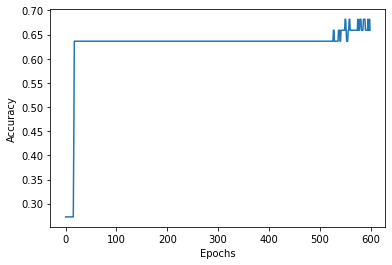

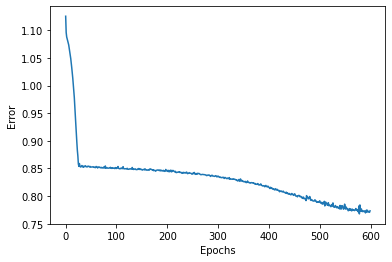

Epoch 1/600
44/44 [==============================] - 0s 2ms/step - loss: 1.1000 - accuracy: 0.2727
Epoch 2/600
44/44 [==============================] - 0s 195us/step - loss: 1.0173 - accuracy: 0.6818
Epoch 3/600
44/44 [==============================] - 0s 181us/step - loss: 0.9517 - accuracy: 0.6818
Epoch 4/600
44/44 [==============================] - 0s 168us/step - loss: 0.9089 - accuracy: 0.6818
Epoch 5/600
44/44 [==============================] - 0s 181us/step - loss: 0.8630 - accuracy: 0.6818
Epoch 6/600
44/44 [==============================] - 0s 185us/step - loss: 0.8418 - accuracy: 0.6818
Epoch 7/600
44/44 [==============================] - 0s 171us/step - loss: 0.8290 - accuracy: 0.6818
Epoch 8/600
44/44 [==============================] - 0s 167us/step - loss: 0.8244 - accuracy: 0.6818
Epoch 9/600
44/44 [==============================] - 0s 196us/step - loss: 0.8246 - accuracy: 0.6818
Epoch 10/600
44/44 [==============================] - 0s 178us/step - loss: 0.8236 - accuracy

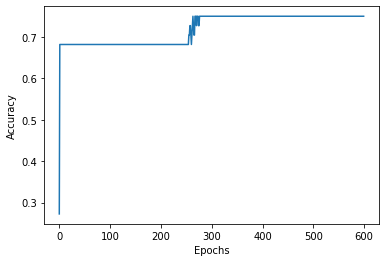

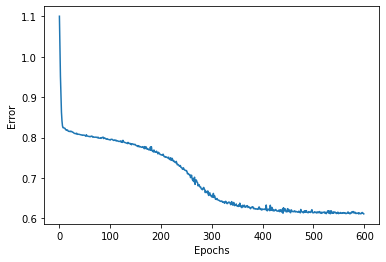

Epoch 1/600
44/44 [==============================] - 0s 2ms/step - loss: 1.1070 - accuracy: 0.2045
Epoch 2/600
44/44 [==============================] - 0s 163us/step - loss: 1.0453 - accuracy: 0.4091
Epoch 3/600
44/44 [==============================] - 0s 183us/step - loss: 1.0005 - accuracy: 0.6818
Epoch 4/600
44/44 [==============================] - 0s 177us/step - loss: 0.9733 - accuracy: 0.6818
Epoch 5/600
44/44 [==============================] - 0s 163us/step - loss: 0.9461 - accuracy: 0.6818
Epoch 6/600
44/44 [==============================] - 0s 164us/step - loss: 0.9311 - accuracy: 0.6818
Epoch 7/600
44/44 [==============================] - 0s 182us/step - loss: 0.9058 - accuracy: 0.6818
Epoch 8/600
44/44 [==============================] - 0s 160us/step - loss: 0.8913 - accuracy: 0.6818
Epoch 9/600
44/44 [==============================] - 0s 168us/step - loss: 0.8736 - accuracy: 0.6818
Epoch 10/600
44/44 [==============================] - 0s 169us/step - loss: 0.8618 - accuracy

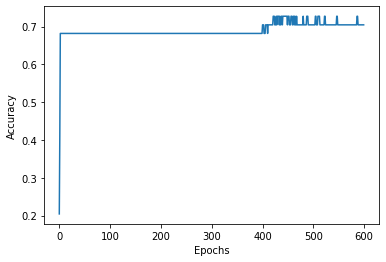

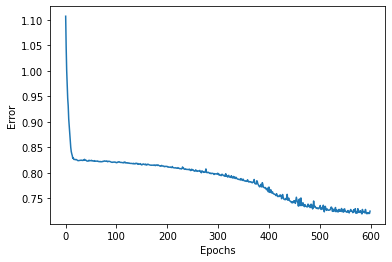

Epoch 1/600
44/44 [==============================] - 0s 2ms/step - loss: 1.0993 - accuracy: 0.1818
Epoch 2/600
44/44 [==============================] - 0s 217us/step - loss: 1.0567 - accuracy: 0.7500
Epoch 3/600
44/44 [==============================] - 0s 197us/step - loss: 1.0126 - accuracy: 0.7500
Epoch 4/600
44/44 [==============================] - 0s 191us/step - loss: 0.9720 - accuracy: 0.7500
Epoch 5/600
44/44 [==============================] - 0s 182us/step - loss: 0.9200 - accuracy: 0.7500
Epoch 6/600
44/44 [==============================] - 0s 174us/step - loss: 0.8691 - accuracy: 0.7500
Epoch 7/600
44/44 [==============================] - 0s 171us/step - loss: 0.8171 - accuracy: 0.7500
Epoch 8/600
44/44 [==============================] - 0s 170us/step - loss: 0.7760 - accuracy: 0.7500
Epoch 9/600
44/44 [==============================] - 0s 174us/step - loss: 0.7386 - accuracy: 0.7500
Epoch 10/600
44/44 [==============================] - 0s 206us/step - loss: 0.7206 - accuracy

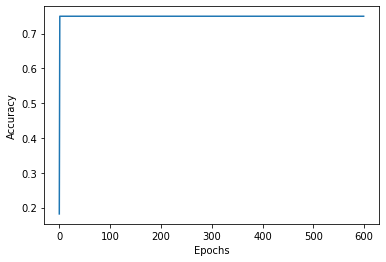

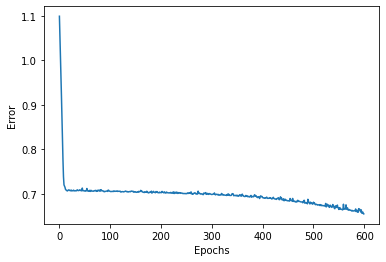

Epoch 1/600
44/44 [==============================] - 0s 2ms/step - loss: 1.1015 - accuracy: 0.3409
Epoch 2/600
44/44 [==============================] - 0s 207us/step - loss: 1.0807 - accuracy: 0.3636
Epoch 3/600
44/44 [==============================] - 0s 187us/step - loss: 1.0613 - accuracy: 0.6136
Epoch 4/600
44/44 [==============================] - 0s 188us/step - loss: 1.0440 - accuracy: 0.6136
Epoch 5/600
44/44 [==============================] - 0s 184us/step - loss: 1.0240 - accuracy: 0.6136
Epoch 6/600
44/44 [==============================] - 0s 202us/step - loss: 1.0004 - accuracy: 0.6136
Epoch 7/600
44/44 [==============================] - 0s 205us/step - loss: 0.9746 - accuracy: 0.6136
Epoch 8/600
44/44 [==============================] - 0s 182us/step - loss: 0.9447 - accuracy: 0.6136
Epoch 9/600
44/44 [==============================] - 0s 181us/step - loss: 0.9207 - accuracy: 0.6136
Epoch 10/600
44/44 [==============================] - 0s 173us/step - loss: 0.8927 - accuracy

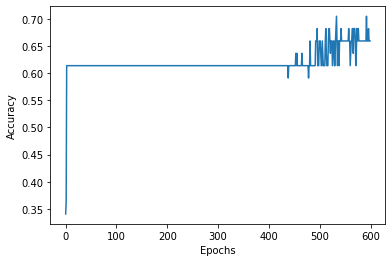

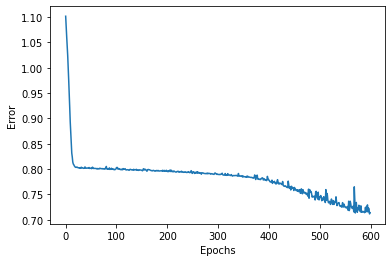

Epoch 1/600
44/44 [==============================] - 0s 2ms/step - loss: 1.0785 - accuracy: 0.4773
Epoch 2/600
44/44 [==============================] - 0s 264us/step - loss: 1.0415 - accuracy: 0.7045
Epoch 3/600
44/44 [==============================] - 0s 177us/step - loss: 0.9995 - accuracy: 0.7045
Epoch 4/600
44/44 [==============================] - 0s 166us/step - loss: 0.9614 - accuracy: 0.7045
Epoch 5/600
44/44 [==============================] - 0s 169us/step - loss: 0.9321 - accuracy: 0.7045
Epoch 6/600
44/44 [==============================] - 0s 171us/step - loss: 0.8951 - accuracy: 0.7045
Epoch 7/600
44/44 [==============================] - 0s 161us/step - loss: 0.8573 - accuracy: 0.7045
Epoch 8/600
44/44 [==============================] - 0s 185us/step - loss: 0.8295 - accuracy: 0.7045
Epoch 9/600
44/44 [==============================] - 0s 189us/step - loss: 0.8187 - accuracy: 0.7045
Epoch 10/600
44/44 [==============================] - 0s 208us/step - loss: 0.8118 - accuracy

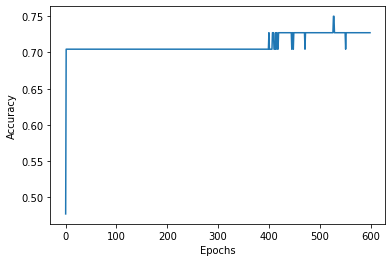

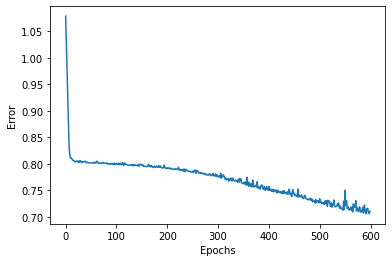

In [32]:
from keras.models import Sequential
from matplotlib import pyplot as plt

def larger_model():
	# create model
	model = Sequential()
	model.add(layers.Dense(24, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(layers.Dense(12, kernel_initializer='normal', activation='relu'))
	model.add(layers.Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
  
# evaluate model with standardized dataset

for column in output_columns:
	network = larger_model()
	# print(y_train_3[column])
	history= network.fit(X_train_3[column], y_train_3[column], epochs=600, batch_size=10)
	test_loss, test_acc = network.evaluate(X_test_3[column], y_test_3[column])
	print('test_acc:', test_acc, 'test_loss', test_loss)
	print(column)
	plt.xlabel('Epochs') 
    # naming the y axis 
	plt.ylabel('Accuracy') 
	plt.plot(history.history['accuracy'])
	plt.show()

	plt.xlabel('Epochs') 
    # naming the y axis 
	plt.ylabel('Error') 
	plt.plot(history.history['loss'])
	plt.show()

	# predictions = network.predict(X_train)
	# # print(predictions)
	# print(y_train_[column])



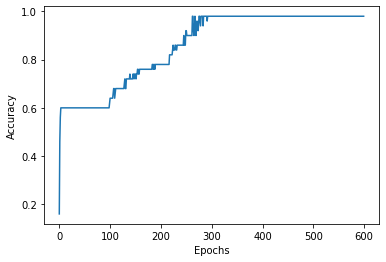

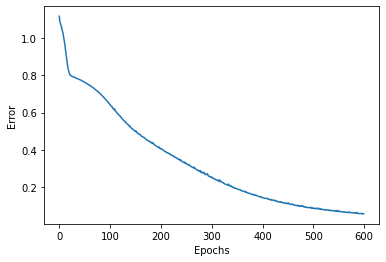

In [0]:
# from matplotlib import pyplot as plt

# def larger_model():
# 	# create model
# 	model = Sequential()
# 	model.add(layers.Dense(18, input_dim=5, kernel_initializer='normal', activation='relu'))
# 	model.add(layers.Dense(12, kernel_initializer='normal', activation='relu'))
# 	model.add(layers.Dense(3, activation='softmax'))
# 	# Compile model
# 	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 	return model
  
# # evaluate model with standardized dataset
# network = larger_model()
# history= network.fit(X_train_3, y_train_3, epochs=600, batch_size=10)

# y_total = to_categorical(y_3)

# test_loss, test_acc = network.evaluate(X, y_total)


# print(history.history.keys())
plt.xlabel('Epochs') 
    # naming the y axis 
plt.ylabel('Accuracy') 
plt.plot(history.history['accuracy'])
plt.show()

plt.xlabel('Epochs') 
    # naming the y axis 
plt.ylabel('Error') 
plt.plot(history.history['loss'])
plt.show()
# print('test_acc:', test_acc, 'test_loss', test_loss)

# predictions = network.predict(X_train)
# print(predictions)
# print(y_train)